# Wavelet Tranformation
This juypter notebook is used to understand the Wavelet and its tranformation starting from 2D to a 3D implementation

## Imports

In [6]:
# Usual imports
import matplotlib.pyplot as plt
import numpy as np

# Importing the PyWavelets library
import pywt
import pydicom


## Visualization of Expanded and Shrunken wavelets

Expanded Wavelet: Low-frequency components are better resolved, but time resolution is poor. This corresponds to larger scales (S), which stretch the wavelet.

Shrunken Wavelet: High-frequency components are better resolved, with good time resolution. This corresponds to smaller scales (S), which shrink the wavelet.

/tmp/ipykernel_122127/33834926.py:2: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = pywt.ContinuousWavelet('cmor')
/tmp/ipykernel_122127/33834926.py:9: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  expanded_wavelet = pywt.ContinuousWavelet(wavelet.name).wavefun(length=1000)[0]
/tmp/ipykernel_122127/33834926.py:14: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (exa

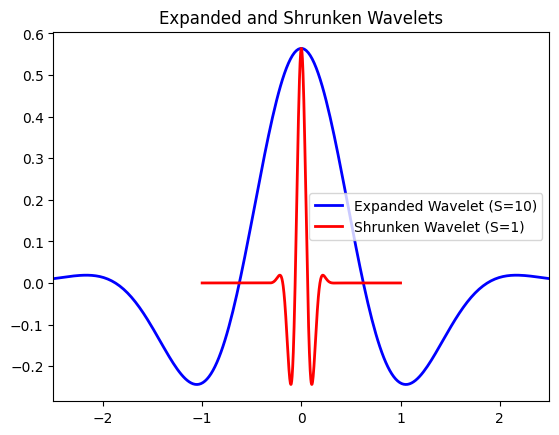

In [7]:

# Using the ContinuousWavelet class to create a wavelet object
wavelet = pywt.ContinuousWavelet('cmor')

# Original time vector (for reference, before scaling)
t = np.linspace(-1, 1, 1000)

# Expanded Wavelet (low frequency, bad time resolution and larger scale)
S_large = 10  # Large scale for low-frequency resolution
expanded_wavelet = pywt.ContinuousWavelet(wavelet.name).wavefun(length=1000)[0]
expanded_wavelet_time = t * S_large  # Stretch the time axis for expanded wavelet

# Shrunken Wavelet (high frequency, good time resolution and smaller scale)
S_small = 1  # Small scale for high-frequency resolution
shrunken_wavelet = pywt.ContinuousWavelet(wavelet.name).wavefun(length=1000)[0]
shrunken_wavelet_time = t * S_small  # Compress the time axis for shrunken wavelet 

# Plot both wavelets on the same figure for comparison
fig, ax = plt.subplots()
ax.plot(expanded_wavelet_time, expanded_wavelet, label=f'Expanded Wavelet (S={S_large})', color='blue', linewidth=2)
ax.plot(shrunken_wavelet_time, shrunken_wavelet, label=f'Shrunken Wavelet (S={S_small})', color='red', linewidth=2)

# Zoom in to see the difference
ax.set_xlim(-2.5, 2.5)

# Titles and legend
ax.set_title('Expanded and Shrunken Wavelets')
ax.legend()

# Show plot
plt.show()


## Using PyWavelets 

A pre-defined method is found in py wavelet for a 2D wavelet transform.

This is applied so that the excpeted outcomes can be seen

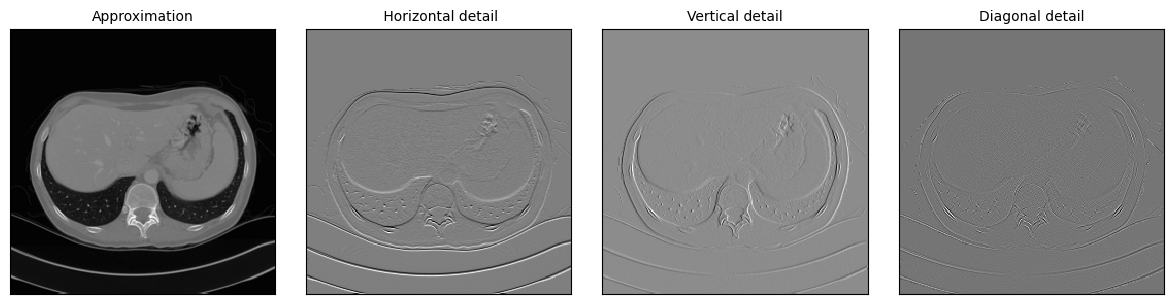

In [8]:
# DCM images directory
dcm_dir = "/home/grahampelle/cce3015/code/assignment-1/CHAOS-Test-Sets/CT/11/DICOM_anon/"

# Loading a single image from the directory
img = pydicom.dcmread(dcm_dir + "i0020,0000b.dcm").pixel_array

# 2D Discrete Wavelet Transform on the image and plot the approximation and detail results
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(img, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()
